Regression in Scikit Learn\
Prepare By: Ejaz-ur-Rehman\
Date: 24-03-2025\
Email ID: ijazfinance@gmail.com

In [97]:
# import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [98]:
# import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [99]:
# simple linear regression
x = df[['age']]
y = df['fare']


In [100]:
# chek null values
x.isnull().sum()/len(x) *100


age    19.86532
dtype: float64

In [101]:
y.isnull().sum()/len(y) *100

np.float64(0.0)

In [102]:
# Fill missing age values with the mean age
df['age'].fillna(df['age'].mean(), inplace=True)

# Check if missing values are filled
print(df.isnull().sum())


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_20500\1988420289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [103]:
x

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [104]:
x.shape

(891, 1)

In [105]:
y.shape

(891,)

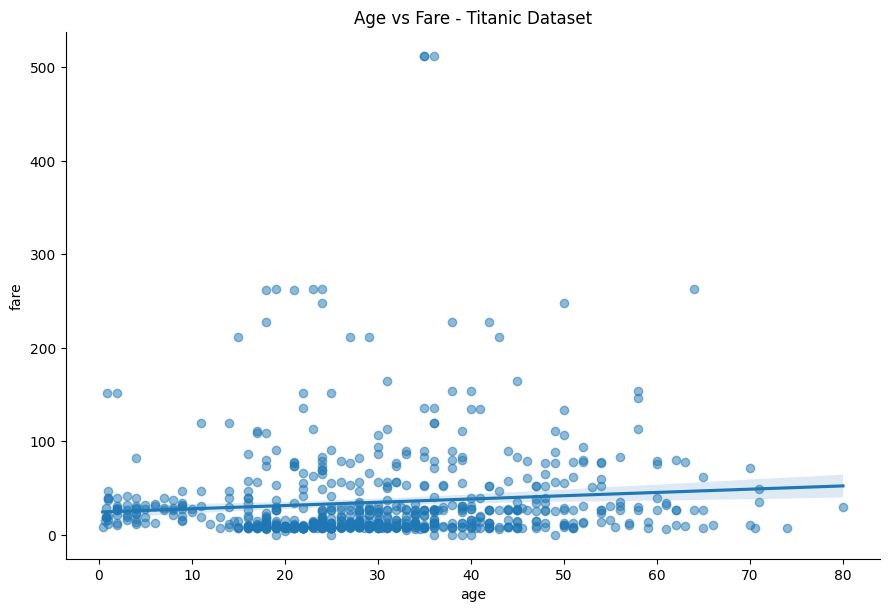

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Drop missing values in Age and Fare columns
df = df[['age', 'fare']].dropna()

# Create the lmplot
sns.lmplot(x='age', y='fare', data=df, aspect=1.5, height=6, scatter_kws={'alpha':0.5})

# Show the plot
plt.title("Age vs Fare - Titanic Dataset")
plt.show()


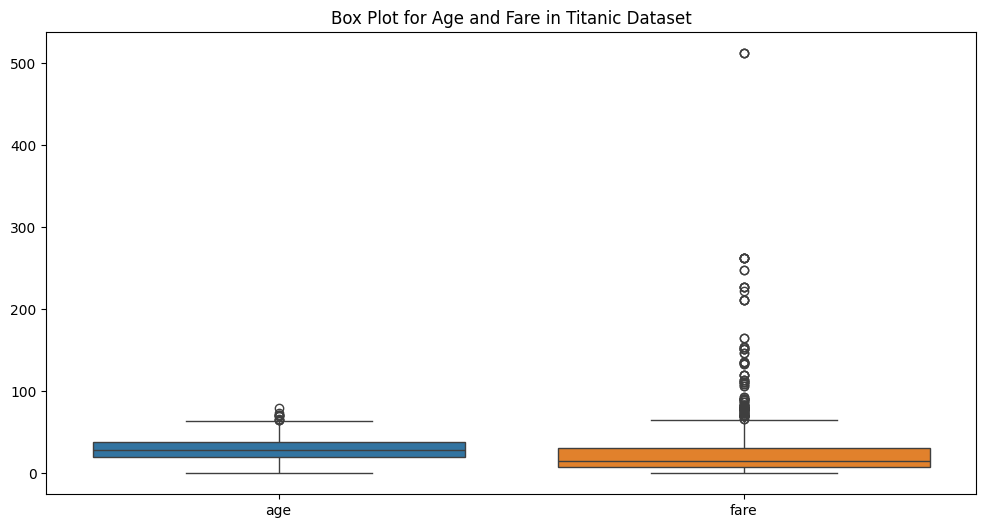

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Set figure size
plt.figure(figsize=(12, 6))

# Create a box plot for Age and Fare
sns.boxplot(data=df[['age', 'fare']])

# Add title
plt.title("Box Plot for Age and Fare in Titanic Dataset")

# Show the plot
plt.show()


In [108]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Selecting only Age and Fare columns
df = df[['age', 'fare']].dropna()


In [109]:
# Define the IQR Function to Remove Outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers from Age and Fare
df_cleaned = remove_outliers_iqr(df, 'age')
df_cleaned = remove_outliers_iqr(df_cleaned, 'fare')

# Print the number of rows before and after removing outliers
print(f"Original dataset rows: {df.shape[0]}")
print(f"Cleaned dataset rows: {df_cleaned.shape[0]}")


Original dataset rows: 714
Cleaned dataset rows: 607


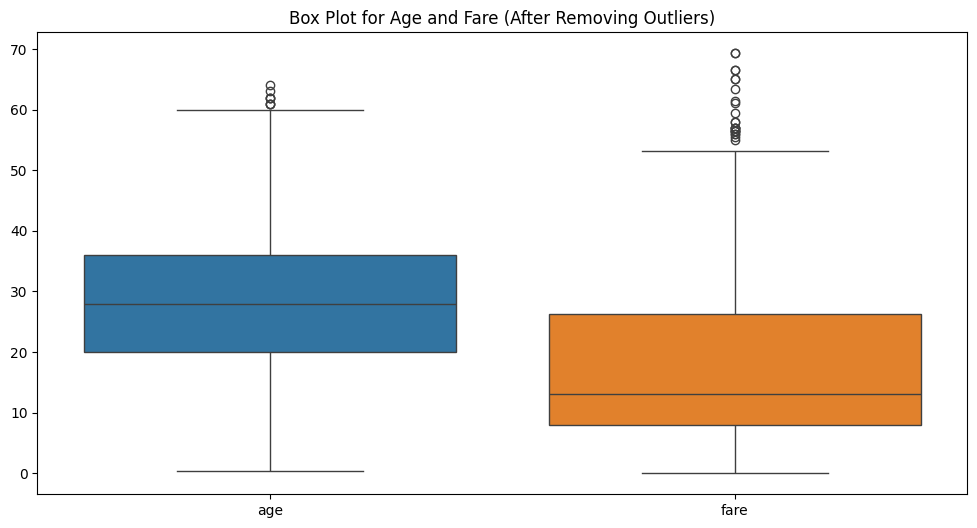

In [110]:
# Visualize the Box Plot After Removing Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['age', 'fare']])
plt.title("Box Plot for Age and Fare (After Removing Outliers)")
plt.show()


In [111]:
# Modify IQR to Remove All Outliers
def remove_outliers_iqr(df, column, multiplier=1.2):  # Stricter multiplier
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define stricter bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Filter within the stricter bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply stricter IQR to remove all outliers
df_cleaned = remove_outliers_iqr(df, 'age', multiplier=1.2)
df_cleaned = remove_outliers_iqr(df_cleaned, 'fare', multiplier=1.2)

# Print row count before and after outlier removal
print(f"Original dataset rows: {df.shape[0]}")
print(f"Cleaned dataset rows: {df_cleaned.shape[0]}")


Original dataset rows: 714
Cleaned dataset rows: 587


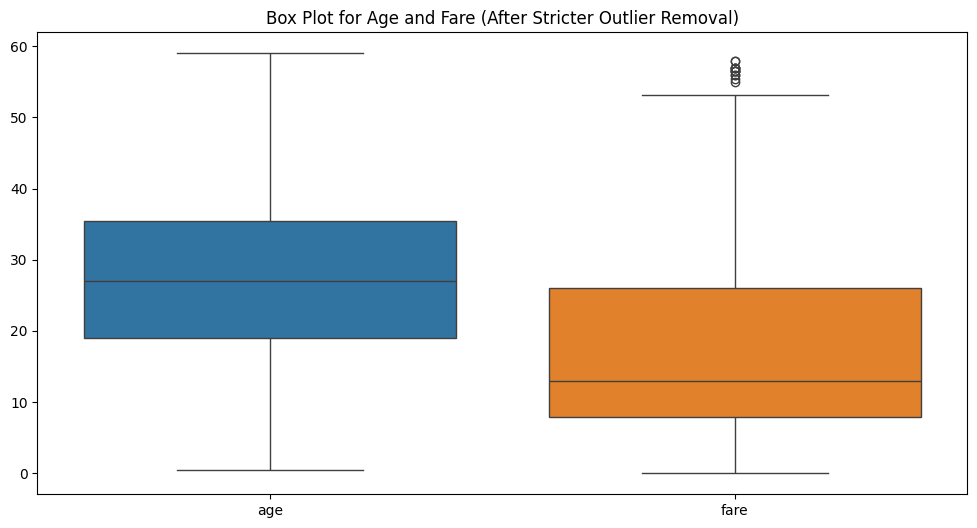

In [112]:
# Plot the New Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['age', 'fare']])
plt.title("Box Plot for Age and Fare (After Stricter Outlier Removal)")
plt.show()


Original dataset rows: 714
Cleaned dataset rows: 573


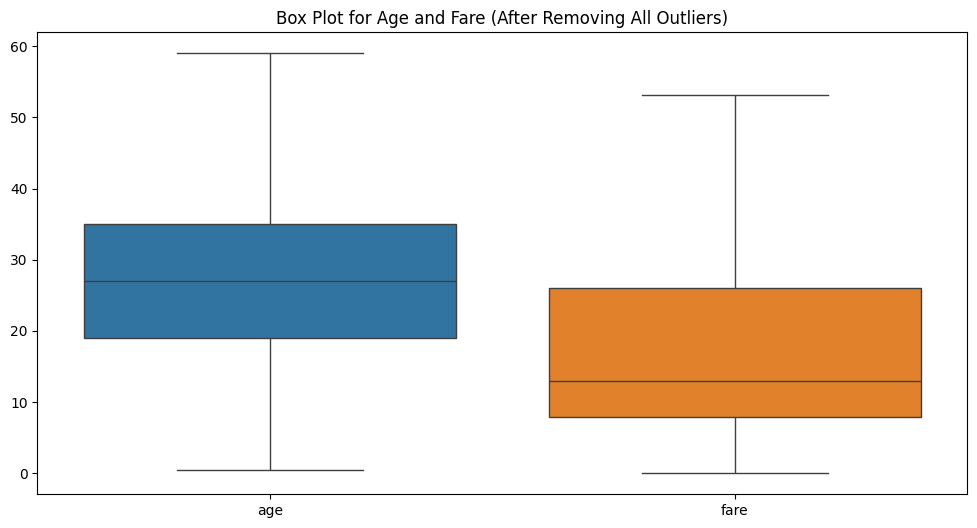

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Selecting only Age and Fare columns, removing NaN values
df = df[['age', 'fare']].dropna()

# Function to remove outliers based on a strict IQR multiplier
def remove_outliers_iqr(df, column, multiplier):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply stricter filtering for Age (1.2 IQR) and Fare (1.0 IQR)
df_cleaned = remove_outliers_iqr(df, 'age', multiplier=1.2)
df_cleaned = remove_outliers_iqr(df_cleaned, 'fare', multiplier=1.0)  # More strict for Fare

# Print row count before and after outlier removal
print(f"Original dataset rows: {df.shape[0]}")
print(f"Cleaned dataset rows: {df_cleaned.shape[0]}")

# Plot the updated Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['age', 'fare']])
plt.title("Box Plot for Age and Fare (After Removing All Outliers)")
plt.show()


In [114]:
df_linear = df[["age", "fare"]]

In [115]:
X = df_linear[['age']]
y = df_linear['fare']

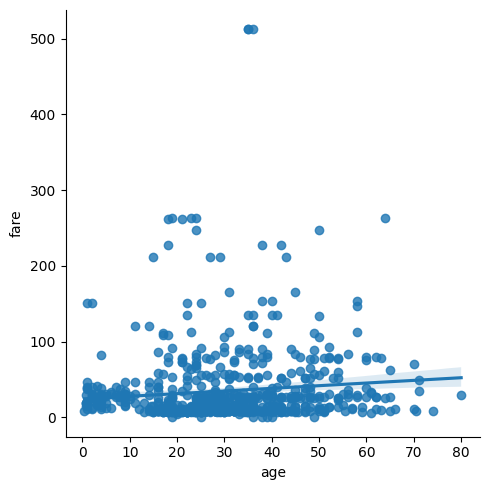

In [117]:
sns.lmplot(data= df_linear, x='age', y='fare')

In [118]:
# recall model
model = LinearRegression()
# fit the model
model.fit(X, y)

LinearRegression()

In [122]:
# prediction
model.predict([[80]])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.29799599])

<Axes: xlabel='fare'>

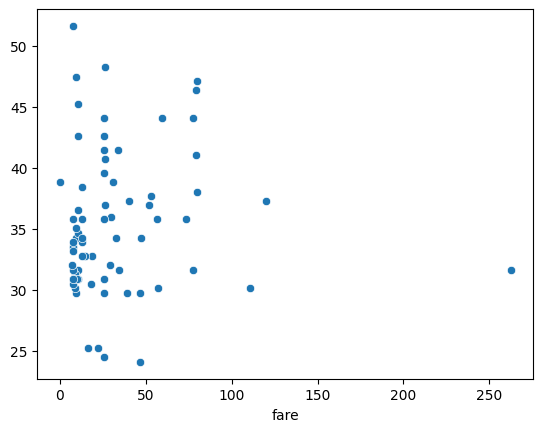

In [143]:
# model evaluation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

# model recall
model = LinearRegression()

# model training
model.fit(X_train, y_train)

# model prediction
predictions = model.predict(X_test)

# compare
sns.scatterplot(x= y_test, y=predictions)

In [144]:
model.score(X_test, y_test)

-0.00795538289448694

- A negative score (-0.015) in model.score(X_test, y_test) for a regression model usually means that the model is performing worse than a simple mean predictor (i.e., worse than just predicting the average of y_test for every input).

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_true= y_test, y_pred= predictions)
MSE = mean_squared_error(y_true= y_test, y_pred= predictions)
RMSE = np.sqrt(MSE)
RSQ = r2_score (y_true= y_test, y_pred= predictions)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("RSQ: ", RSQ)

MAE:  25.042552497617088
MSE:  1435.1448599098812
RMSE:  37.88330582076861
RSQ:  -0.00795538289448694


In [146]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")


Train R² Score: 0.0100
Test R² Score: -0.0080


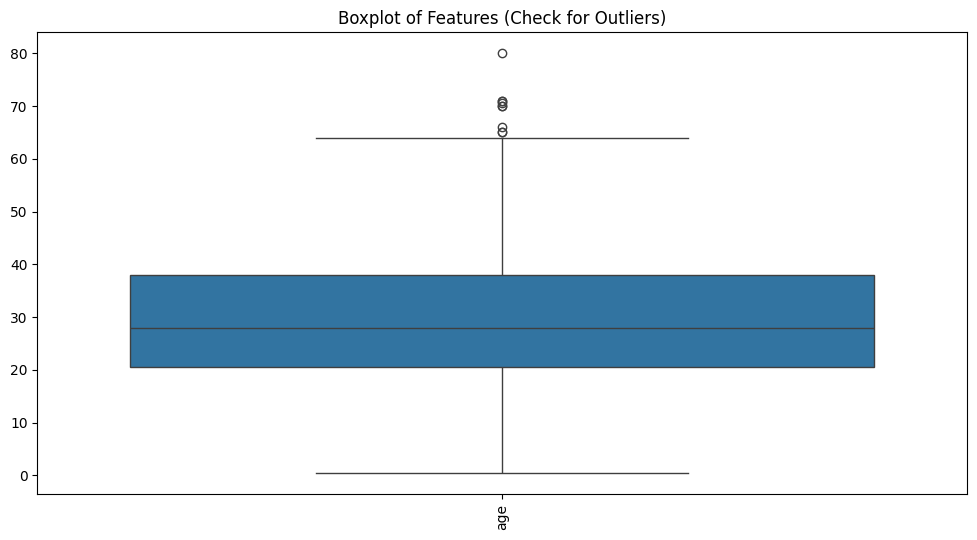

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Check for Outliers)")
plt.show()


In [148]:
from scipy.stats import zscore

X_train_no_outliers = X_train[(zscore(X_train) < 3).all(axis=1)]
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

X_test_no_outliers = X_test[(zscore(X_test) < 3).all(axis=1)]
y_test_no_outliers = y_test.loc[X_test_no_outliers.index]


In [149]:
from scipy.stats import zscore

X_train_no_outliers = X_train[(zscore(X_train) < 3).all(axis=1)]
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

X_test_no_outliers = X_test[(zscore(X_test) < 3).all(axis=1)]
y_test_no_outliers = y_test.loc[X_test_no_outliers.index]


In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_outliers)
X_test_scaled = scaler.transform(X_test_no_outliers)


In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_true= y_test, y_pred= predictions)
MSE = mean_squared_error(y_true= y_test, y_pred= predictions)
RMSE = np.sqrt(MSE)
RSQ = r2_score (y_true= y_test, y_pred= predictions)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("RSQ: ", RSQ)

MAE:  25.042552497617088
MSE:  1435.1448599098812
RMSE:  37.88330582076861
RSQ:  -0.00795538289448694


In [152]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_no_outliers)

importance = pd.DataFrame({'Feature': X_train.columns, 'Coef': model.coef_})
print(importance.sort_values(by="Coef", ascending=False))


  Feature      Coef
0     age  5.510024


In [153]:
X_train_selected = X_train_scaled[:, abs(model.coef_) > 0.01]
X_test_selected = X_test_scaled[:, abs(model.coef_) > 0.01]


In [155]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Ensure X_train and y_train are properly defined
model.fit(X_train_scaled, y_train_no_outliers)  # Fit the model


LinearRegression()

In [157]:
# Compute R² for train and test sets
r2_train = model.score(X_train_selected, y_train_no_outliers)
r2_test = model.score(X_test_selected, y_test_no_outliers)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")


Train R²: 0.0103
Test R²: -0.0088
